SMS Spam Collection dataset(https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) to classify tweets as spam or not spam using TF-IDF and Word2Vec for feature extraction and Preprocess text (tokenization, stop-word removal, lemmatization). Use a classical machine learning model (e.g., Logistic Regression, Naïve Bayes, SVM, or Random Forest) for classification.

In [ ]:
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1


In [ ]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import gensim.downloader as api

In [ ]:
#data loading
sms_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nlp/lab9/spam.csv", encoding='latin-1')

In [ ]:
#data cleaning
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms_df.shape

(5572, 5)

In [ ]:
sms_df["Unnamed: 2"].isnull().sum()

5522

In [ ]:
sms_df["Unnamed: 3"].isnull().sum()

5560

In [ ]:
sms_df["Unnamed: 4"].isnull().sum()

5566

In [ ]:
sms_df=sms_df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [ ]:
sms_df.columns=["target","email"]

In [ ]:
sms_df["target"]=sms_df["target"].replace({"spam":-1,"ham":1})

<ipython-input-11-8c65aceb30f4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sms_df["target"]=sms_df["target"].replace({"spam":-1,"ham":1})


In [ ]:
#data preprocessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [w for w in words if w.isalnum() and w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

sms_df['processed_email'] = sms_df['email'].apply(preprocess_text)

sms_df=sms_df.drop(["email"],axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
feat=sms_df["processed_email"]
lab=sms_df["target"]

In [ ]:
train_feat,test_feat,train_lab,test_lab=train_test_split(feat,lab,test_size=0.3,random_state=42,stratify=lab)

In [ ]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(train_feat)
x_test = vectorizer.transform(test_feat)


In [ ]:
lr=LogisticRegression()
lr.fit(x_train,train_lab)
pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
print("train_acc: ", accuracy_score(train_lab,train_pred))
print("test_acc: ", accuracy_score(test_lab,pred))

train_acc:  0.9638461538461538
test_acc:  0.9527511961722488


In [ ]:
df_tf=pd.DataFrame({"feature":test_feat,"label":test_lab,"pred":pred})
df_tf.head()

,feature,label,pred
2463,good afternoon babe go day job prospect yet mi...,1,1
364,good afternoon sunshine dawn day refreshed hap...,1,1
2036,jot thing want remember later,1,1
1644,india take lead,1,1
943,also sorta blown couple time recently id rathe...,1,1


In [ ]:
df_tf["pred"].value_counts()

,count
pred,
1,1517
-1,155


In [ ]:
df_tf["label"].value_counts()

,count
label,
1,1448
-1,224


In [ ]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,train_lab)
pred_nb=nb.predict(x_test)
train_pred_nb=nb.predict(x_train)
print("train_acc_naive bayes: ", accuracy_score(train_lab,train_pred_nb))
print("test_acc_naive bayes: ", accuracy_score(test_lab,pred_nb))


train_acc_naive bayes:  0.9805128205128205
test_acc_naive bayes:  0.9581339712918661


In [ ]:
#binomial naive bayes
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,train_lab)
pred_bnb=bnb.predict(x_test)
train_pred_bnb=bnb.predict(x_train)
print("train_acc_naive bayes: ", accuracy_score(train_lab,train_pred_bnb))
print("test_acc_naive bayes: ", accuracy_score(test_lab,pred_bnb))

train_acc_naive bayes:  0.9833333333333333
test_acc_naive bayes:  0.9605263157894737


In [ ]:
#SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,train_lab)
pred_svm=svm.predict(x_test)
train_pred_svm=svm.predict(x_train)
print("train_acc_svm: ", accuracy_score(train_lab,train_pred_svm))
print("test_acc_svm: ", accuracy_score(test_lab,pred_svm))

train_acc_svm:  0.997948717948718
test_acc_svm:  0.9706937799043063


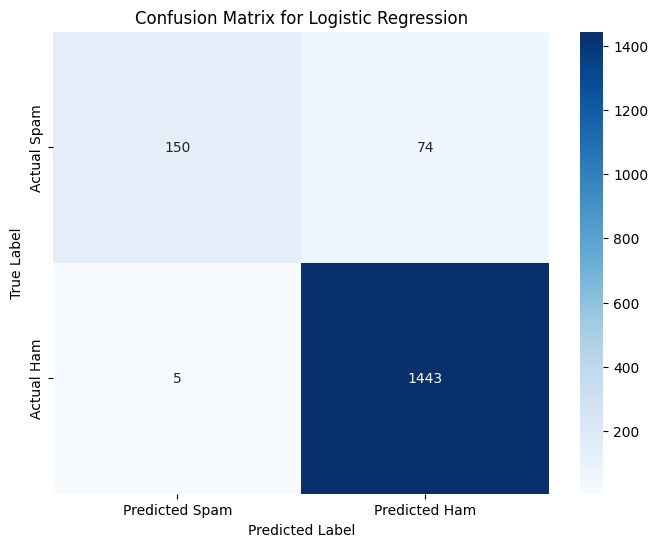

In [ ]:

import matplotlib.pyplot as plt
# Compute confusion matrix
cm = confusion_matrix(test_lab, pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Spam', 'Predicted Ham'],
            yticklabels=['Actual Spam', 'Actual Ham'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,train_lab)
pred_rf=rf.predict(x_test)
train_pred_rf=rf.predict(x_train)
print("train_acc_rf: ", accuracy_score(train_lab,train_pred_rf))
print("test_acc_rf: ", accuracy_score(test_lab,pred_rf))


train_acc_rf:  1.0
test_acc_rf:  0.9641148325358851


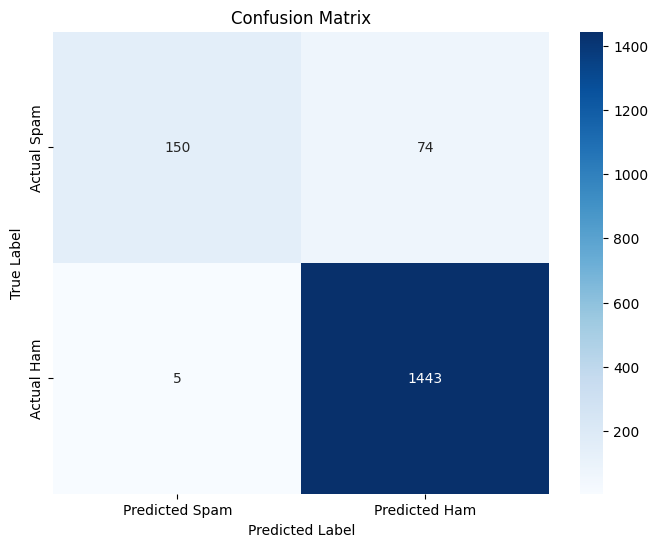

In [ ]:

cm = confusion_matrix(test_lab, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Spam", "Predicted Ham"],
            yticklabels=["Actual Spam", "Actual Ham"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


by using Word2vec

In [ ]:
# by using Word2vec
sentences = [nltk.word_tokenize(text) for text in sms_df['processed_email']]
model = Word2Vec(sentences, vector_size=5, window=15, min_count=1, workers=4) #no of core of cpu used for training

def document_vector(doc):
    words = nltk.word_tokenize(doc)
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(5)  # Return a zero vector if no words are found in the vocabulary

x_train_w2v = np.array([document_vector(doc) for doc in train_feat])
x_test_w2v = np.array([document_vector(doc) for doc in test_feat])


lr_w2v = LogisticRegression()
lr_w2v.fit(x_train_w2v, train_lab)
pred_w2v = lr_w2v.predict(x_test_w2v)
accuracy_w2v = accuracy_score(test_lab, pred_w2v)
print(f"Word2Vec test Accuracy: {accuracy_w2v}")


Word2Vec test Accuracy: 0.909688995215311


In [ ]:
#make a df of feature test feat test label and pred
df_w2v=pd.DataFrame({"feature":test_feat,"label":test_lab,"pred":pred_w2v})
df_w2v.head()


,feature,label,pred
2463,good afternoon babe go day job prospect yet mi...,1,1
364,good afternoon sunshine dawn day refreshed hap...,1,1
2036,jot thing want remember later,1,1
1644,india take lead,1,1
943,also sorta blown couple time recently id rathe...,1,1


In [ ]:
#in df_w2v sum of unique values of pred
df_w2v["pred"].value_counts()

,count
pred,
1,1541
-1,131


In [ ]:
df_w2v["label"].value_counts()

,count
label,
1,1448
-1,224


In [ ]:
#binomial naive bayes
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train_w2v,train_lab)
pred_bnb=bnb.predict(x_test_w2v)
train_pred_bnb=bnb.predict(x_train_w2v)
print("train_acc_naive bayes: ", accuracy_score(train_lab,train_pred_bnb))
print("test_acc_naive bayes: ", accuracy_score(test_lab,pred_bnb))


train_acc_naive bayes:  0.865897435897436
test_acc_naive bayes:  0.8660287081339713


In [ ]:
#svm
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train_w2v,train_lab)
pred_svm=svm.predict(x_test_w2v)
train_pred_svm=svm.predict(x_train_w2v)
print("train_acc_svm: ", accuracy_score(train_lab,train_pred_svm))
print("test_acc_svm: ", accuracy_score(test_lab,pred_svm))


train_acc_svm:  0.9264102564102564
test_acc_svm:  0.9264354066985646


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_w2v,train_lab)
pred_rf=rf.predict(x_test_w2v)
train_pred_rf=rf.predict(x_train_w2v)
print("train_acc_rf: ", accuracy_score(train_lab,train_pred_rf))
print("test_acc_rf: ", accuracy_score(test_lab,pred_rf))


train_acc_rf:  1.0
test_acc_rf:  0.9413875598086124


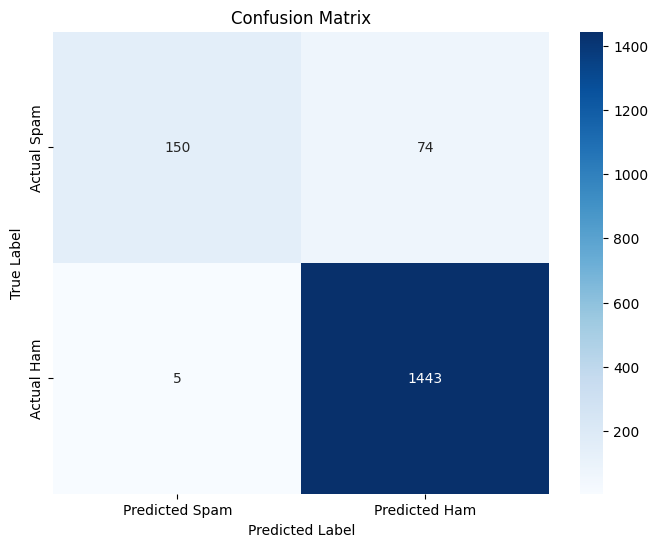

In [ ]:

cm = confusion_matrix(test_lab, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Spam", "Predicted Ham"],
            yticklabels=["Actual Spam", "Actual Ham"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
